### Calculating and Plotting a Composite With Significance

What is a composite?  mean of a field conditioned on the value of another field.

_Example:_

We have heard that ENSO changes atmospheric circulation and impacts precipitation and temperature globally.  We can explore this using composites. 

_Specific statement of the problem:_ 

What are the precipitation anomalies during El Nino vs. Neutral vs. La Nina and how are they different?

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

#### ENSO

We have an index called Nino3.4 that quantifies ENSO.  When it is large and positive, we say there is an El Nino.  When it is large and negative, we say there is a La Nina.  In between, we say it is neutral.

Nino3.4 is calculated at the SST anomalies in a particular region in the Tropical Pacific.  We calculated this previously using the NOAA OISST data and then Subsetting, Groupby, and Aggregating. I wrote this data to a file:

`/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc`

In [3]:
file_nino34='/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34=xr.open_dataset(file_nino34)
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

This data goes from 1982-2019

We can plot it as a timeseries

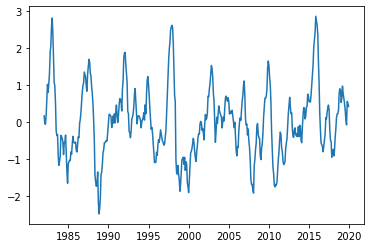

In [4]:
plt.plot(ds_nino34['time'],ds_nino34['sst'])

### Defining El Nino, La Nina, and Neutral

Nino3.4 >= 1 -> El Nino

Nino3.4 <= -1 -> La Nina

Nino3.4 > -1 and Nino3.4 < 1 -> Neutral

In [5]:
elnino=ds_nino34['sst'].where(ds_nino34['sst']>=1)
lanina=ds_nino34['sst'].where(ds_nino34['sst']<=-1)
neutral=ds_nino34['sst'].where(np.logical_and(ds_nino34['sst']>-1,
                                              ds_nino34['sst']<1))

#### How many months do we have with El Nino, La Nina, and Neutral?

In [6]:
print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

El Nino:  61
Neutral:  330
La Nina:  65
[array(61), array(65), array(330)]


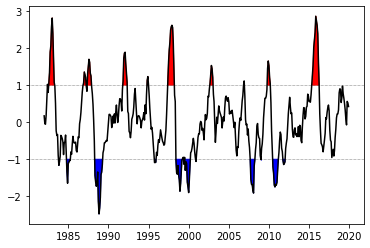

In [7]:
plt.plot(ds_nino34['time'],ds_nino34['sst'],'k')
plt.fill_between(ds_nino34['time'],1,elnino,color='red')
plt.fill_between(ds_nino34['time'],lanina, -1,color='blue')
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted')

### Precipitation Data

We will use the Global Precipitation Climatology Project (GPCP) Monthly Precipitation Data located in:

`/shared/obs/gridded/GPCP/monthly/precip.mon.mean.nc`

In [8]:
file='/shared/obs/gridded/GPCP/monthly/precip.mon.mean.nc'
ds_precip=xr.open_dataset(file)
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 496)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

This data goes from 1979-2020.  Let's select the same times as the nino34 data.

In [9]:
ds_precip=ds_precip.sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 456)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 1982-01-01 1982-02-01 ... 2020-01-01
    lat_bnds   (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

### We need to make anomalies of our precipitation

In [10]:
ds_climo=ds_precip.groupby('time.month').mean()
ds_anoms=ds_precip.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2, time: 456)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 0.01149 0.02916 ... -0.2741 -0.2252

### Now we can select the dates that match El Nino, La Nina, and Neutral

In [11]:
elnino_precip=ds_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_precip=ds_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_precip=ds_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_precip=[elnino_precip,lanina_precip,neutral_precip]
print(comp_precip)

[<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, lon) float32 -0.02096 -0.02566 ... -0.001947 -0.02559, <xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, lon) float32 0.03459 0.03775 0.0

Text(0.5, 0.98, 'Composite Precipitation Anomalies during ENSO')

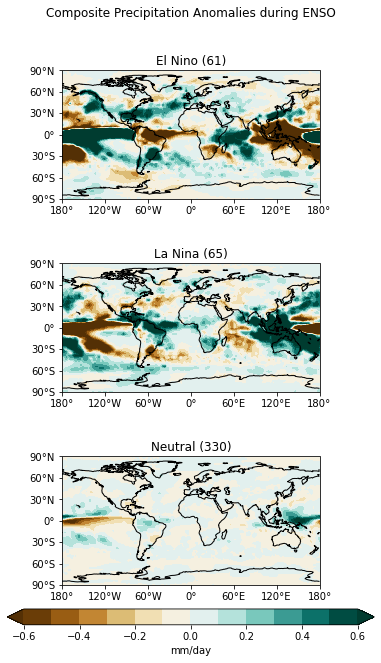

In [12]:
labels=['El Nino','La Nina', 'Neutral']
clevs=np.arange(-0.6,0.7,0.1)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_precip):

        # Select the season
        data=comp_precip[i]['precip']

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during ENSO')

We want to know where the El Nino or La Nina composites are truly different from the Neutral composite.  

Last week we discussed the issue of trying to compare our neutral composite with our El Nino or La Nina composite, but we have issues of sample size.  

* Neutral has 330 values
* El Nino has 61 values
* La Nina has 65 values

Many more values went into calculating the mean for neutral. 

One solution to address this is to calculate statistical significance.

### First, let's calculate differences

In [13]:
diff_precip=[elnino_precip-neutral_precip, 
             lanina_precip-neutral_precip]

### Now plot our difference maps

Make the difference plots first and think about what they tell you scientifically before calculating and adding significance to them. 

Significance is a way of quantifying whether your results occurred by random chance.  

If you don't have a scientific result, then significance will not create one.   

Text(0.5, 0.98, 'Composite Precipitation Differences during ENSO')

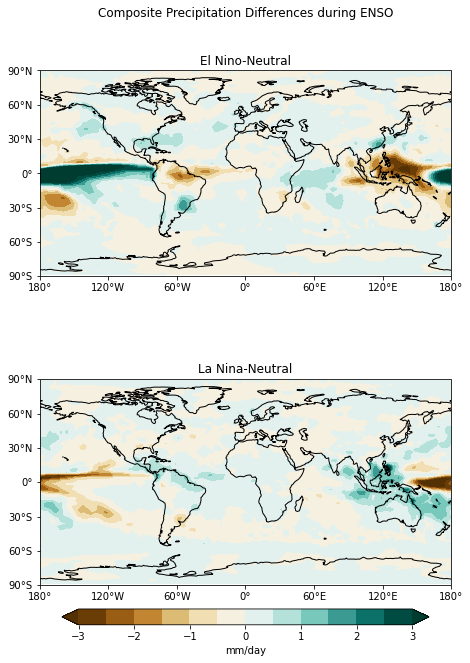

In [14]:
labels=['El Nino-Neutral','La Nina-Neutral']
clevs=np.arange(-3,3.5,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(diff_precip):

        # Select the season
        data=diff_precip[i]['precip']

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=diff_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,diff_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences during ENSO')

### Calculate Significance Using the built-in Stats Function

__State our problem clearly__

Where is the mean difference different enough to be considered significant (meaning its unlikely it happened by random chance)?

$\mu_x$ = El Nino Composite ($n_x$=61)

$\mu_y$ = Neutral Composite ($n_y$=330)

__Define our Null Hypothesis__

Null Hypothesis (H0): Differences between the two means is zero

$\mu_x-\mu_y=0$

__Pick a level of significance__

Pick a p-value (or level of significance).  Typically, 1% or 5% is chosen.

You must pick this level first. 

* It is cheating to pick it after you see the results. 
* It is also cheating to make changes to your analysis to get a desirable p-value.

Doing things to your data or analysis to get a higher p-value is 
called [P-hacking](https://www-nature-com.mutex.gmu.edu/news/scientific-method-statistical-errors-1.14700)

In [15]:
p=0.05

### Use the stats `ttest_ind` function

Let's follow the documentation to understand what this function does...

[ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#r3566833beaa2-2)

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

#### Input: 

Two arrays (a,b) to compare the means and perform a ttest
* a=values that go into elnino_precip composite 
* b=values that go into neutral_precip

We can set several other optional parameters for this function:

axis:  Axis along which to compute test. If None, compute over the whole arrays, a, and b.

* We want this calculated over our whole grid/array, so no need to specify

equal_var: If True (default), perform a standard independent 2 sample test that assumes equal population variances [1]. If False, perform Welch’s t-test, which does not assume equal population variance [2].

* We probably don't have equal variance, so set this to `False`

nan_policy: {‘propagate’, ‘raise’, ‘omit’}, optional
Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):

`propagate`: returns nan

`raise`: throws an error

`omit`: performs the calculations ignoring nan values

* We can leave this as default

#### Output 

`t-statistic`: The calculated t-statistic.

`pvalue`: The two-tailed p-value. This is the p-value telling us the % chance we have in being incorrect if we reject the null hypothesis. This is the information we want. We will identify where this `pvalue` is less than our `p=0.05`. 

In [16]:
from scipy.stats import ttest_ind

elnino_precip_vals=ds_anoms.sel(time=elnino.dropna(dim='time')['time'])
lanina_precip_vals=ds_anoms.sel(time=lanina.dropna(dim='time')['time'])
neutral_precip_vals=ds_anoms.sel(time=neutral.dropna(dim='time')['time'])

tstat,pval=ttest_ind(elnino_precip_vals['precip'], 
                neutral_precip_vals['precip'], 
                equal_var = False)

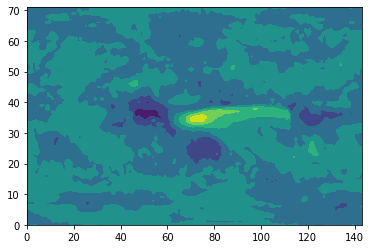

In [17]:
plt.contourf(tstat)

### Make a mask of where the value is significant

In [18]:
mask_diff=diff_precip[0]['precip'].where(pval<p)
mask_diff

<xarray.DataArray 'precip' (lat: 72, lon: 144)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.03890288,         nan,         nan, ..., -0.04499131,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

## Plot our difference between composites and also mark where its significant

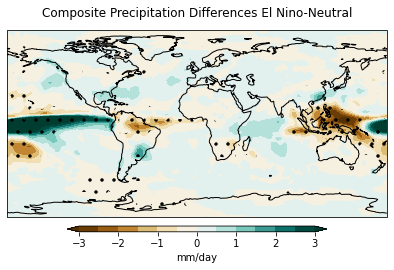

In [19]:
labels=['El Nino-Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()})


data=diff_precip[0]['precip']

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_precip[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_precip[0]['lat'],data,clevs,
                    transform = ccrs.PlateCarree(),
                    cmap='BrBG',extend='both')

axs.contourf(lons,diff_precip[0]['lat'],mask_data,[0,1],
              transform = ccrs.PlateCarree(),colors='None',
             hatches=['.',''],extend='both',alpha=0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences El Nino-Neutral')
plt.savefig('stats_ttest.png')